In [2]:
# 1. Loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
data = pd.read_csv('/content/Wholesale customers data.csv')

# View basic info
print(data.head())
print(data.info())
print(data.describe())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen  

In [3]:
from sklearn.preprocessing import StandardScaler


data_clean = data.drop(columns=['Channel', 'Region'])

# Standardizing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_clean)

## K Means Clustering




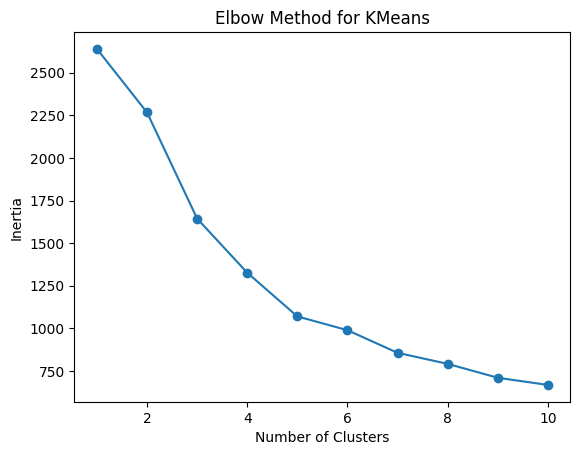

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)


plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans')
plt.show()

# Apply KMeans with optimal k
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(scaled_data)

## Hierarchical Clustering

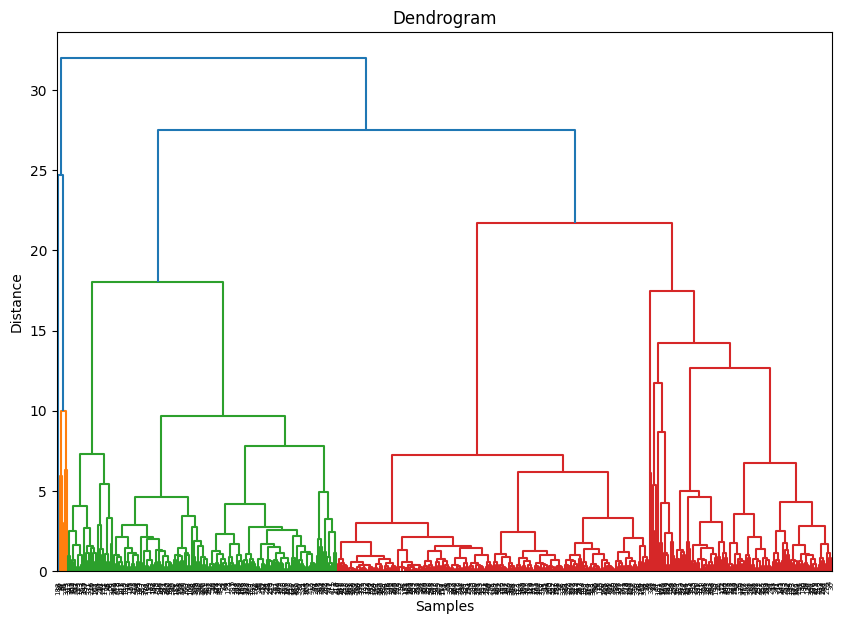

In [5]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Dendrogram
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
labels_agglo = agglo.fit_predict(scaled_data)


##  DBSCAN Clustering

In [6]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(scaled_data)

# Check how many noise points (-1)
import numpy as np
print("Noise points:", np.sum(labels_dbscan == -1))


Noise points: 27


## PCA for Dimensionality Reduction

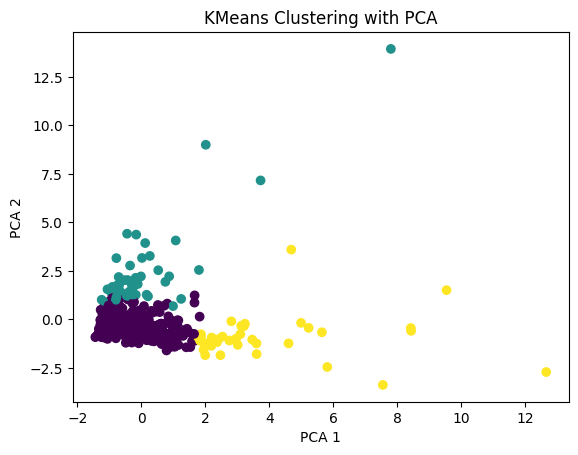

In [7]:
from sklearn.decomposition import PCA

# Reduce to 2 components for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Visualize KMeans Clusters
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels_kmeans)
plt.title("KMeans Clustering with PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()
